In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

In [24]:
file_path = "Rotten_Tomatoes_Movies3.xls"
data = pd.read_excel(file_path, engine = "xlrd")

In [25]:
print("Original Dataset:")
print(data.dtypes)

Original Dataset:
movie_title                   object
movie_info                    object
critics_consensus             object
rating                        object
genre                         object
directors                     object
writers                       object
cast                          object
in_theaters_date      datetime64[ns]
on_streaming_date     datetime64[ns]
runtime_in_minutes           float64
studio_name                   object
tomatometer_status            object
tomatometer_rating             int64
tomatometer_count              int64
audience_rating              float64
dtype: object


In [26]:
datetime_cols = data.select_dtypes(include=['datetime']).columns
print("\nDatetime Columns:", datetime_cols)


Datetime Columns: Index(['in_theaters_date', 'on_streaming_date'], dtype='object')


In [27]:
for col in datetime_cols:
    data[col + "_year"] = data[col].dt.year
    data[col + "_month"] = data[col].dt.month
    data[col + "_day"] = data[col].dt.day

In [28]:
data = data.drop(columns = datetime_cols)

In [29]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype(str)

In [30]:
data = data.dropna()

In [31]:
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

In [32]:
def categorize_rating(rating):
    if rating <= 5:
        return "Low"
    elif rating <= 8:
        return "Medium"
    else:
        return "High"

In [33]:
data["audience_class"] = data["audience_rating"].apply(categorize_rating)

In [34]:
X = data.drop(columns=["audience_rating", "audience_class"])
y = data["audience_class"]

In [35]:
print("Class Distribution in Training Data:")
print(y.value_counts())

Class Distribution in Training Data:
audience_class
High      15525
Low          10
Medium       10
Name: count, dtype: int64


In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_pred = model.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)


Accuracy Score: 0.9983917658411064


In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[3104    0    0]
 [   2    0    0]
 [   3    0    0]]

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      3104
         Low       0.00      0.00      0.00         2
      Medium       0.00      0.00      0.00         3

    accuracy                           1.00      3109
   macro avg       0.33      0.33      0.33      3109
weighted avg       1.00      1.00      1.00      3109



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)

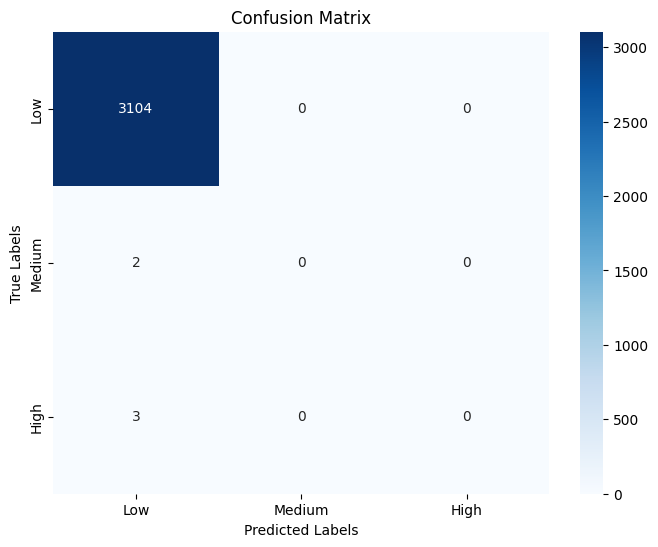

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

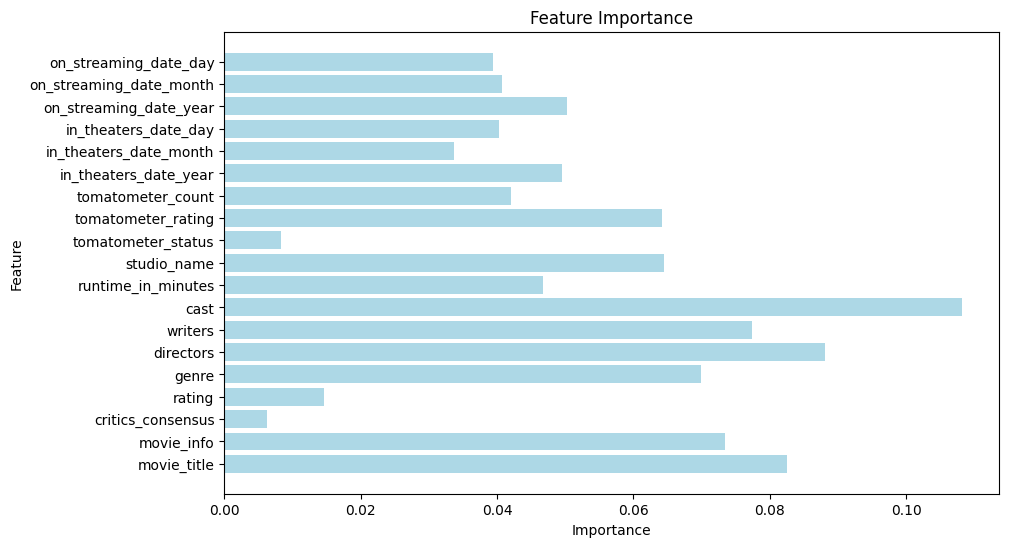

In [45]:
importances = model.feature_importances_
indices = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(indices, importances, color='lightblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()